In [17]:
import pickle
import random
import heapq

import numpy as np
from matplotlib import pyplot as plt

import random
import heapq


def generate_gridworld(n, prob):
    """
    生成大小为n x n的随机Gridworld，其中prob控制1出现的频率。
    返回值是一个包含n个列表的列表，每个列表包含n个随机数（0或1）。
    """
    gridworld = [[int(random.random() < prob) for j in range(n)] for i in range(n)]
    return gridworld


def find_path(maze, start, end):
    """
    使用 A* 算法搜索迷宫最优路径
    :param maze: 二维迷宫数组，0 表示障碍，1 表示可通行
    :param start: 起点坐标 (row, col)
    :param end: 终点坐标 (row, col)
    :return: 返回最优路径
    """
    ROW, COL = len(maze), len(maze[0])
    pq = []  # 使用优先队列存储搜索节点
    heapq.heappush(pq, (0, start, [start]))
    visited = set()  # 使用 set 存储已访问的节点
    while pq:
        f, (row, col), path = heapq.heappop(pq)
        if (row, col) in visited:
            continue
        visited.add((row, col))
        if (row, col) == end:
            return path
        for (r, c) in [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]:
            if 0 <= r < ROW and 0 <= c < COL and maze[r][c] == 1 and (r, c) not in visited:
                g = len(path)  # 当前节点到起点的距离
                h = abs(r-end[0]) + abs(c-end[1])  # 当前节点到终点的曼哈顿距离
                f = g + h
                heapq.heappush(pq, (f, (r, c), path + [(r, c)]))
    return False


def generate_solvable_gridworld(n, prob=0.6):
    """
    生成一个可解的大小为n x n的Gridworld。
    返回值是一个元组，包含生成的Gridworld、起点和终点。
    """
    while True:
        gridworld = generate_gridworld(n, prob=prob)
        # start = (random.randint(0, n-1), random.randint(0, n-1))
        # end = (random.randint(0, n-1), random.randint(0, n-1))
        start = (0, 0)
        end = (n - 1, n - 1)

        optimal_path = find_path(gridworld, start, end)
        if gridworld[start[0]][start[1]] == 1 and gridworld[end[0]][
            end[1]] == 1 and start != end and optimal_path is not False:
            return gridworld, start, end, optimal_path


# if __name__ == '__main__':
#     # 示例代码
#     gridworld, start, end, optimal_path = generate_solvable_gridworld(32, prob=0.8)
#     gridworld = np.array(gridworld) * 1.0
#     print(gridworld)
#     print("start:", start)
#     print("end:", end)

#     plt.imshow(gridworld)
#     plt.show()

    # train_set = {'gridworld': [],
    #              'start': [],
    #              'end': []}
    #
    # test_set = {'gridworld': [],
    #             'start': [],
    #             'end': []}
    #
    # for i in range(6400):
    #     gridworld, start, end = generate_solvable_gridworld(8)
    #     train_set['gridworld'].append(gridworld)
    #     train_set['start'].append(start)
    #     train_set['end'].append(end)

    # 将字典保存到文件中
    # with open("gridworld3x3_train_dict.pickle", "wb") as f:
    #     pickle.dump(train_set, f)
#     np.savetxt('maze16_0.02_5.txt', gridworld)
    # maze = np.loadtxt('maze32_1.txt')


In [171]:
# length_list = []

# for i in range(size):
#     for j in range(size):
#         if grid[i][j] == 1:
# #             total += 1
#             if i == j == size - 1:
#                 length_list.append(0)
#             else:
#                 length_list.append(len(find_path(grid, (i, j), (31, 31))))
#         else:
# #             length_list.append(-1)
#             pass
                
# len(length_list)
# np.mean(length_list)

32.61538461538461

In [161]:
# length_map = np.array(length_list)
# length_map = np.reshape(length_map, (32, 32))

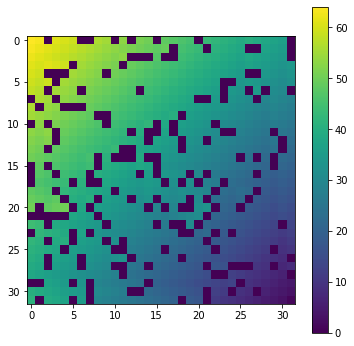

In [170]:
# plt.figure(figsize=(6, 6))
# plt.imshow((length_map+1))
# plt.colorbar()

In [18]:
# plt.imshow(gridworld)

In [19]:
# np.savetxt('maze32_0.2.txt', gridworld)

In [20]:
assert 1, print(0)

In [21]:
import numpy as np
import math

actions = [(0, -1), (-1, 0), (0, 1), (1, 0)]  # 左， 上， 右， 下

class GridWorld:
    def __init__(self, grid, start, goal, actions):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.actions = actions
        self.state = self.start

    def reset(self, position=None):
#         self.state = self.start
        if position is None:
            while True:
                self.state = tuple(np.random.randint(0, self.grid.shape[0], 2))
                if self.grid[self.state[0]][self.state[1]] != 0 and self.state != self.goal:
                    break
        else:
            x = int(position[0])
            y = int(position[1])
            assert self.grid[x][y] != 0, '起点不能是墙壁'
            assert (x, y) != self.goal, '起点不能是终点'
            
            self.state = (x, y)
                
        return self.state

    def step(self, action):
        next_state = (self.state[0] + self.actions[action][0], self.state[1] + self.actions[action][1])
        done = False
        
        if not (0 <= next_state[0] < self.grid.shape[0] and 0 <= next_state[1] < self.grid.shape[1]):  # 出界
            reward = -0.1
            next_state = self.state
        elif self.grid[next_state[0]][next_state[1]] == 0:  # 撞墙
            reward = -0.1
            next_state = self.state
        elif next_state == self.goal:  # 到达终点
            reward = 1
            done = True
        else:  # 行走
            reward = -0.04
            done = False

        self.state = next_state
        return next_state, reward, done

In [22]:
import numpy as np
import math

actions = [(0, -1), (-1, 0), (0, 1), (1, 0)]  # 左， 上， 右， 下

class GridWorld_br:
    def __init__(self, grid, start, goal, actions):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.actions = actions
        self.state = self.start

    def reset(self, position=None):
#         self.state = self.start
        if position is None:
            while True:
                self.state = tuple(np.random.randint(0, self.grid.shape[0], 2))
                if self.grid[self.state[0]][self.state[1]] != 0 and self.state != self.goal:
                    break
        else:
            x = int(position[0])
            y = int(position[1])
            assert self.grid[x][y] != 0, '起点不能是墙壁'
            assert (x, y) != self.goal, '起点不能是终点'
            
            self.state = (x, y)
                
        return self.state

    def step(self, action):
        next_state = (self.state[0] + self.actions[action][0], self.state[1] + self.actions[action][1])
        done = False
        
        if not (0 <= next_state[0] < self.grid.shape[0] and 0 <= next_state[1] < self.grid.shape[1]):  # 出界
            reward = -0.1
            next_state = self.state
        elif self.grid[next_state[0]][next_state[1]] == 0:  # 撞墙
            reward = -0.1
            next_state = self.state
        elif next_state == self.goal:  # 到达终点
            reward = 1
            done = True
        else:  # 行走
            reward = 0
            done = False

        self.state = next_state
        return next_state, reward, done

In [23]:
gridworld = GridWorld(grid, start, goal, actions)
# gridworld.state
# gridworld.step(3)  # 左， 上， 右， 下
# gridworld.state 
# show(grid, gridworld.state)

In [24]:
# eps_list = []
# ran_list = []

# for steps_done in range(1000*500):
#     eps_threshold = EPS_END + (EPS_START - EPS_END) * \
#                 math.exp(-1. * steps_done / EPS_DECAY)
#     ran_list.append(np.random.uniform(0, 1))
#     eps_list.append(eps_threshold)

# plt.plot(ran_list)
# plt.plot(eps_list)


In [25]:
class Agent:
    def __init__(self, alpha, gamma, epsilon, action_size, state_size):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.action_size = action_size
        self.state_size = state_size
        self.q_values = np.zeros((*state_size, action_size))
        
        self.steps_done = 0

    def choose_action(self, state):
        # 随着进行，eps_threshold逐渐降低
        eps_threshold = EPS_END + (EPS_START - EPS_END) * \
            math.exp(-1. * self.steps_done / EPS_DECAY)
#         eps_threshold = 0.1
        self.steps_done += 1

        # 常规情况选择价值最高的动作
        if np.random.uniform(0, 1) < eps_threshold:
            action = np.random.choice(self.action_size)
        else:
            action = np.argmax(self.q_values[state[0], state[1]])
        
        self.steps_done += 1
        return action

    def learn(self, state, action, reward, next_state):
        old_q_value = self.q_values[state[0], state[1], action]
        next_max_q_value = np.max(self.q_values[next_state[0], next_state[1]])
        new_q_value = (1 - self.alpha) * old_q_value + self.alpha * (reward + self.gamma * next_max_q_value)
        self.q_values[state[0], state[1], action] = new_q_value




In [26]:
import matplotlib.pyplot as plt
from IPython import display

def show(qmaze, state=None):
    plt.grid('on')
    nrows, ncols = grid.shape
    ax = plt.gca()
    ax.set_xticks(np.arange(0.5, nrows, 1))
    ax.set_yticks(np.arange(0.5, ncols, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    canvas = np.copy(grid)
#     for row,col in qmaze.visited:
#         canvas[row,col] = 0.6
#     rat_row, rat_col, _ = grid.state
#     canvas[rat_row, rat_col] = 0.3   # rat cell
#     canvas[nrows-1, ncols-1] = 0.9 # cheese cell
    if state is not None:
        canvas[state[0], state[1]] = 0.5
    img = plt.imshow(canvas, interpolation='none', cmap='gray')
    return img

In [27]:
maze_path = 'maze32_0.2.txt'# 'maze8n_4.txt'  # 'games/GridWorld/maze16_0.05_4.txt'  # maze16_0.05_1.txt
maze = np.loadtxt(maze_path)

In [28]:
maze

array([[1., 1., 0., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]])

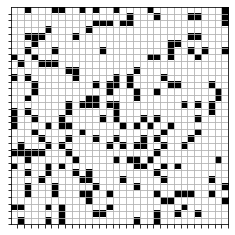

In [314]:
# Hyperparameters
alpha = 0.5
gamma = 0.95
episodes = 5000
size = 32
start = (0, 0)
goal = (31, 31)

epsilon = 0.1
EPS_START = 0.1
EPS_END = 0.1
EPS_DECAY = 1
# EPS_START = 0.1
# EPS_END = 0.1
# EPS_DECAY = 1

# Generate a random gridworld with walls
# grid = np.ones((size, size))
# for _ in range(size):  # Add random walls
#     x, y = np.random.randint(0, size, 2)
#     if (x, y) != start and (x, y) != goal:
#         grid[x, y] = 0
grid = maze
grid = np.array(grid) * 1.0
show(grid)

In [315]:
def moving_average(data_list, window_size=100):
    moving_averages = []
    for i in range(len(data_list)):
        if i < window_size:
            window_data = data_list[:i + 1]
        else:
            window_data = data_list[i - window_size + 1:i + 1]
        average = sum(window_data) / len(window_data)
        moving_averages.append(average)
    
    return moving_averages

def plot_rewards(episode_rewards, show_result=False, ylabel='Rewards', window_size=100, maze_size=8):
    plt.figure(1)
    rewards_t = np.array(episode_rewards)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel(ylabel)
    plt.plot(rewards_t)
    
    # Compute the moving average with the specified window size and plot it
    moving_averages = moving_average(episode_rewards, window_size)
    plt.plot(moving_averages)
    
#     if ylabel == 'Rewards':
#         if maze_size == 16:
#             plt.axhline(y=-385, color='Red', linestyle='--')  # 
#             plt.ylim([-385*10, -385*0.8])
# #             plt.ylim([-500, 55])
#         elif maze_size == 8:
#             plt.axhline(y=50, color='Red', linestyle='--')
#             plt.ylim([-200, 55])
#     if ylabel == 'win_eval':
#         plt.ylim([0, 1.1])

#     plt.axhline(y=15, color='Red', linestyle='--')  # 
#     plt.ylim([0, 200])

    plt.pause(0.001)  # pause a bit so that plots are updated
    if 1:
        if not show_result:
            display.display(plt.gcf())  # "get current figure"（获取当前图形）
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

In [316]:
# Initialize the agent and the environment
gridworld = GridWorld(grid, start, goal, actions)
agent = Agent(alpha, gamma, epsilon, len(actions), (size, size))
episode_steps_list = []
episode_rewards_list = []
succ_rate = []

for episode in range(episodes):  # episodes
    state = gridworld.reset()
    done = False
    steps = 0
    total_reward = 0

    while not done:
#         print(steps)
        action = agent.choose_action(state)
#         print(state, action)
        next_state, reward, done = gridworld.step(action)
#         print(next_state, reward, done)
        agent.learn(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        steps += 1
        
        if steps >= 128:
            break
        
#         print()
        
#         break
    
    episode_steps_list.append(steps)
    episode_rewards_list.append(total_reward)
    
#     succ_rate.append(test())

#     plot_rewards(episode_steps_list, ylabel='Steps')
    
    print(f"Episode {episode + 1}: Total Reward = {total_reward}, Total Steps = {steps}")

Episode 1: Total Reward = -6.380000000000002, Total Steps = 128
Episode 2: Total Reward = -7.28, Total Steps = 128
Episode 3: Total Reward = -6.740000000000001, Total Steps = 128
Episode 4: Total Reward = -6.020000000000003, Total Steps = 128
Episode 5: Total Reward = -6.020000000000002, Total Steps = 128
Episode 6: Total Reward = -6.020000000000001, Total Steps = 128
Episode 7: Total Reward = -5.540000000000001, Total Steps = 128
Episode 8: Total Reward = -6.380000000000001, Total Steps = 128
Episode 9: Total Reward = -6.680000000000001, Total Steps = 128
Episode 10: Total Reward = -6.140000000000002, Total Steps = 128
Episode 11: Total Reward = -7.2799999999999985, Total Steps = 128
Episode 12: Total Reward = -6.740000000000001, Total Steps = 128
Episode 13: Total Reward = -5.780000000000002, Total Steps = 128
Episode 14: Total Reward = -5.420000000000003, Total Steps = 128
Episode 15: Total Reward = -5.540000000000004, Total Steps = 128
Episode 16: Total Reward = -5.780000000000004,

Episode 130: Total Reward = -6.200000000000003, Total Steps = 128
Episode 131: Total Reward = -5.900000000000001, Total Steps = 128
Episode 132: Total Reward = -5.360000000000004, Total Steps = 128
Episode 133: Total Reward = -5.600000000000001, Total Steps = 128
Episode 134: Total Reward = -5.960000000000002, Total Steps = 128
Episode 135: Total Reward = -5.960000000000003, Total Steps = 128
Episode 136: Total Reward = -5.540000000000003, Total Steps = 128
Episode 137: Total Reward = -5.540000000000004, Total Steps = 128
Episode 138: Total Reward = -6.020000000000004, Total Steps = 128
Episode 139: Total Reward = -5.900000000000002, Total Steps = 128
Episode 140: Total Reward = -5.900000000000003, Total Steps = 128
Episode 141: Total Reward = -2.8800000000000026, Total Steps = 83
Episode 142: Total Reward = -5.360000000000002, Total Steps = 128
Episode 143: Total Reward = -5.4200000000000035, Total Steps = 128
Episode 144: Total Reward = -5.900000000000004, Total Steps = 128
Episode 1

Episode 336: Total Reward = -5.780000000000004, Total Steps = 128
Episode 337: Total Reward = -5.540000000000003, Total Steps = 128
Episode 338: Total Reward = -6.020000000000003, Total Steps = 128
Episode 339: Total Reward = -5.660000000000002, Total Steps = 128
Episode 340: Total Reward = -6.200000000000001, Total Steps = 128
Episode 341: Total Reward = -5.600000000000002, Total Steps = 128
Episode 342: Total Reward = -6.2600000000000025, Total Steps = 128
Episode 343: Total Reward = -1.200000000000001, Total Steps = 53
Episode 344: Total Reward = -5.660000000000002, Total Steps = 128
Episode 345: Total Reward = -5.780000000000002, Total Steps = 128
Episode 346: Total Reward = -6.140000000000003, Total Steps = 128
Episode 347: Total Reward = -5.480000000000003, Total Steps = 128
Episode 348: Total Reward = -5.660000000000004, Total Steps = 128
Episode 349: Total Reward = -5.540000000000004, Total Steps = 128
Episode 350: Total Reward = -2.100000000000002, Total Steps = 74
Episode 351

Episode 507: Total Reward = -5.240000000000004, Total Steps = 128
Episode 508: Total Reward = -5.420000000000003, Total Steps = 128
Episode 509: Total Reward = -5.780000000000004, Total Steps = 128
Episode 510: Total Reward = -4.080000000000004, Total Steps = 113
Episode 511: Total Reward = -0.5000000000000007, Total Steps = 34
Episode 512: Total Reward = -5.840000000000001, Total Steps = 128
Episode 513: Total Reward = -5.420000000000003, Total Steps = 128
Episode 514: Total Reward = -0.6600000000000008, Total Steps = 41
Episode 515: Total Reward = -5.4200000000000035, Total Steps = 128
Episode 516: Total Reward = -2.040000000000002, Total Steps = 71
Episode 517: Total Reward = -6.140000000000002, Total Steps = 128
Episode 518: Total Reward = 0.74, Total Steps = 6
Episode 519: Total Reward = -5.900000000000002, Total Steps = 128
Episode 520: Total Reward = -5.600000000000002, Total Steps = 128
Episode 521: Total Reward = -5.480000000000004, Total Steps = 128
Episode 522: Total Reward 

Episode 693: Total Reward = -5.900000000000002, Total Steps = 128
Episode 694: Total Reward = 0.64, Total Steps = 10
Episode 695: Total Reward = -5.8400000000000025, Total Steps = 128
Episode 696: Total Reward = -4.540000000000003, Total Steps = 123
Episode 697: Total Reward = 0.2999999999999998, Total Steps = 17
Episode 698: Total Reward = -5.840000000000003, Total Steps = 128
Episode 699: Total Reward = -5.600000000000004, Total Steps = 128
Episode 700: Total Reward = -0.3800000000000008, Total Steps = 34
Episode 701: Total Reward = -5.480000000000003, Total Steps = 128
Episode 702: Total Reward = 0.76, Total Steps = 7
Episode 703: Total Reward = -5.480000000000003, Total Steps = 128
Episode 704: Total Reward = -6.200000000000002, Total Steps = 128
Episode 705: Total Reward = 0.76, Total Steps = 7
Episode 706: Total Reward = -5.4200000000000035, Total Steps = 128
Episode 707: Total Reward = 0.1599999999999998, Total Steps = 22
Episode 708: Total Reward = 0.1599999999999998, Total Ste

Episode 838: Total Reward = -4.200000000000004, Total Steps = 122
Episode 839: Total Reward = -0.7200000000000009, Total Steps = 41
Episode 840: Total Reward = -0.0800000000000003, Total Steps = 25
Episode 841: Total Reward = -5.540000000000004, Total Steps = 128
Episode 842: Total Reward = -3.6200000000000028, Total Steps = 112
Episode 843: Total Reward = -0.3000000000000005, Total Steps = 29
Episode 844: Total Reward = -5.660000000000003, Total Steps = 128
Episode 845: Total Reward = -4.120000000000004, Total Steps = 123
Episode 846: Total Reward = -3.4600000000000026, Total Steps = 105
Episode 847: Total Reward = -5.600000000000003, Total Steps = 128
Episode 848: Total Reward = 0.07999999999999974, Total Steps = 24
Episode 849: Total Reward = -0.860000000000001, Total Steps = 43
Episode 850: Total Reward = -5.720000000000002, Total Steps = 128
Episode 851: Total Reward = -0.6200000000000008, Total Steps = 40
Episode 852: Total Reward = -2.9200000000000026, Total Steps = 90
Episode 8

Episode 1076: Total Reward = -5.600000000000003, Total Steps = 128
Episode 1077: Total Reward = -0.0800000000000003, Total Steps = 28
Episode 1078: Total Reward = 0.31999999999999995, Total Steps = 18
Episode 1079: Total Reward = -2.7200000000000024, Total Steps = 91
Episode 1080: Total Reward = -0.26000000000000045, Total Steps = 31
Episode 1081: Total Reward = -3.240000000000003, Total Steps = 104
Episode 1082: Total Reward = -5.600000000000003, Total Steps = 128
Episode 1083: Total Reward = -1.5400000000000014, Total Steps = 63
Episode 1084: Total Reward = -1.4000000000000012, Total Steps = 61
Episode 1085: Total Reward = -2.8800000000000026, Total Steps = 89
Episode 1086: Total Reward = 0.36, Total Steps = 17
Episode 1087: Total Reward = -0.820000000000001, Total Steps = 42
Episode 1088: Total Reward = -1.020000000000001, Total Steps = 47
Episode 1089: Total Reward = -0.24000000000000044, Total Steps = 32
Episode 1090: Total Reward = -5.360000000000004, Total Steps = 128
Episode 10

Episode 1260: Total Reward = -5.540000000000003, Total Steps = 128
Episode 1261: Total Reward = -2.080000000000002, Total Steps = 75
Episode 1262: Total Reward = -0.8000000000000009, Total Steps = 43
Episode 1263: Total Reward = -0.36000000000000054, Total Steps = 35
Episode 1264: Total Reward = -1.4800000000000013, Total Steps = 63
Episode 1265: Total Reward = -2.8600000000000025, Total Steps = 90
Episode 1266: Total Reward = 0.4800000000000001, Total Steps = 14
Episode 1267: Total Reward = 0.1399999999999999, Total Steps = 21
Episode 1268: Total Reward = -0.4000000000000006, Total Steps = 33
Episode 1269: Total Reward = -0.6000000000000008, Total Steps = 41
Episode 1270: Total Reward = -5.600000000000003, Total Steps = 128
Episode 1271: Total Reward = -0.7200000000000009, Total Steps = 44
Episode 1272: Total Reward = -0.060000000000000275, Total Steps = 26
Episode 1273: Total Reward = -3.3000000000000025, Total Steps = 104
Episode 1274: Total Reward = -2.5800000000000023, Total Steps

Episode 1420: Total Reward = -5.180000000000003, Total Steps = 128
Episode 1421: Total Reward = -4.0000000000000036, Total Steps = 123
Episode 1422: Total Reward = -1.060000000000001, Total Steps = 51
Episode 1423: Total Reward = 0.92, Total Steps = 3
Episode 1424: Total Reward = -0.6400000000000008, Total Steps = 39
Episode 1425: Total Reward = -0.4000000000000006, Total Steps = 36
Episode 1426: Total Reward = -0.12000000000000033, Total Steps = 29
Episode 1427: Total Reward = -2.7400000000000024, Total Steps = 90
Episode 1428: Total Reward = -0.12000000000000033, Total Steps = 29
Episode 1429: Total Reward = -2.080000000000002, Total Steps = 72
Episode 1430: Total Reward = -0.0800000000000003, Total Steps = 28
Episode 1431: Total Reward = -1.3600000000000012, Total Steps = 57
Episode 1432: Total Reward = -0.880000000000001, Total Steps = 48
Episode 1433: Total Reward = -0.6000000000000008, Total Steps = 41
Episode 1434: Total Reward = 0.1599999999999998, Total Steps = 22
Episode 1435

Episode 1601: Total Reward = -2.220000000000002, Total Steps = 74
Episode 1602: Total Reward = -0.0800000000000003, Total Steps = 28
Episode 1603: Total Reward = 0.07999999999999974, Total Steps = 24
Episode 1604: Total Reward = -0.0800000000000003, Total Steps = 28
Episode 1605: Total Reward = -0.3400000000000005, Total Steps = 33
Episode 1606: Total Reward = -1.020000000000001, Total Steps = 50
Episode 1607: Total Reward = -0.28000000000000047, Total Steps = 33
Episode 1608: Total Reward = -0.5400000000000007, Total Steps = 38
Episode 1609: Total Reward = -2.8200000000000025, Total Steps = 92
Episode 1610: Total Reward = -1.9400000000000017, Total Steps = 67
Episode 1611: Total Reward = -5.360000000000004, Total Steps = 128
Episode 1612: Total Reward = -3.2600000000000033, Total Steps = 100
Episode 1613: Total Reward = 0.31999999999999995, Total Steps = 18
Episode 1614: Total Reward = -0.6800000000000008, Total Steps = 43
Episode 1615: Total Reward = 0.23999999999999988, Total Steps 

Episode 1816: Total Reward = -1.3600000000000012, Total Steps = 60
Episode 1817: Total Reward = -0.6400000000000008, Total Steps = 42
Episode 1818: Total Reward = -2.220446049250313e-16, Total Steps = 26
Episode 1819: Total Reward = -0.48000000000000065, Total Steps = 38
Episode 1820: Total Reward = -0.4200000000000006, Total Steps = 35
Episode 1821: Total Reward = 0.05999999999999972, Total Steps = 23
Episode 1822: Total Reward = -0.3200000000000005, Total Steps = 34
Episode 1823: Total Reward = -0.880000000000001, Total Steps = 48
Episode 1824: Total Reward = -0.48000000000000065, Total Steps = 38
Episode 1825: Total Reward = 0.92, Total Steps = 3
Episode 1826: Total Reward = -3.6800000000000033, Total Steps = 109
Episode 1827: Total Reward = -2.200000000000002, Total Steps = 78
Episode 1828: Total Reward = -0.10000000000000031, Total Steps = 27
Episode 1829: Total Reward = -1.3200000000000012, Total Steps = 59
Episode 1830: Total Reward = -0.5000000000000007, Total Steps = 37
Episod

Episode 2111: Total Reward = -0.6800000000000008, Total Steps = 43
Episode 2112: Total Reward = -3.4200000000000026, Total Steps = 107
Episode 2113: Total Reward = -0.1800000000000006, Total Steps = 29
Episode 2114: Total Reward = 0.21999999999999986, Total Steps = 19
Episode 2115: Total Reward = 0.4800000000000001, Total Steps = 14
Episode 2116: Total Reward = 0.36, Total Steps = 17
Episode 2117: Total Reward = 0.8, Total Steps = 6
Episode 2118: Total Reward = -0.4400000000000006, Total Steps = 37
Episode 2119: Total Reward = 0.05999999999999972, Total Steps = 23
Episode 2120: Total Reward = -5.300000000000004, Total Steps = 128
Episode 2121: Total Reward = 0.5000000000000001, Total Steps = 12
Episode 2122: Total Reward = -3.940000000000003, Total Steps = 123
Episode 2123: Total Reward = -0.10000000000000031, Total Steps = 27
Episode 2124: Total Reward = -0.6000000000000008, Total Steps = 41
Episode 2125: Total Reward = -0.840000000000001, Total Steps = 47
Episode 2126: Total Reward =

Episode 2390: Total Reward = -0.7000000000000008, Total Steps = 42
Episode 2391: Total Reward = -0.7600000000000009, Total Steps = 45
Episode 2392: Total Reward = 0.36, Total Steps = 17
Episode 2393: Total Reward = -0.3200000000000005, Total Steps = 34
Episode 2394: Total Reward = 0.33999999999999997, Total Steps = 16
Episode 2395: Total Reward = -0.6800000000000008, Total Steps = 43
Episode 2396: Total Reward = -0.9600000000000011, Total Steps = 50
Episode 2397: Total Reward = -0.860000000000001, Total Steps = 46
Episode 2398: Total Reward = -1.6600000000000015, Total Steps = 66
Episode 2399: Total Reward = -2.240000000000002, Total Steps = 79
Episode 2400: Total Reward = -0.36000000000000054, Total Steps = 35
Episode 2401: Total Reward = -0.6800000000000008, Total Steps = 43
Episode 2402: Total Reward = -0.7600000000000009, Total Steps = 45
Episode 2403: Total Reward = -2.0600000000000023, Total Steps = 73
Episode 2404: Total Reward = 0.6000000000000001, Total Steps = 11
Episode 2405

Episode 2609: Total Reward = -0.3200000000000005, Total Steps = 34
Episode 2610: Total Reward = -0.48000000000000065, Total Steps = 38
Episode 2611: Total Reward = -0.5200000000000007, Total Steps = 36
Episode 2612: Total Reward = -1.040000000000001, Total Steps = 49
Episode 2613: Total Reward = 0.56, Total Steps = 12
Episode 2614: Total Reward = -2.360000000000002, Total Steps = 85
Episode 2615: Total Reward = -2.8600000000000025, Total Steps = 93
Episode 2616: Total Reward = 0.76, Total Steps = 7
Episode 2617: Total Reward = 0.88, Total Steps = 4
Episode 2618: Total Reward = -0.6000000000000008, Total Steps = 41
Episode 2619: Total Reward = -2.220446049250313e-16, Total Steps = 26
Episode 2620: Total Reward = -0.7600000000000009, Total Steps = 45
Episode 2621: Total Reward = 0.4800000000000001, Total Steps = 14
Episode 2622: Total Reward = -0.7400000000000009, Total Steps = 43
Episode 2623: Total Reward = -0.8000000000000009, Total Steps = 43
Episode 2624: Total Reward = -0.200000000

Episode 2825: Total Reward = -0.820000000000001, Total Steps = 45
Episode 2826: Total Reward = -0.12000000000000033, Total Steps = 29
Episode 2827: Total Reward = 0.72, Total Steps = 8
Episode 2828: Total Reward = -1.040000000000001, Total Steps = 49
Episode 2829: Total Reward = -0.1800000000000006, Total Steps = 29
Episode 2830: Total Reward = -0.6200000000000008, Total Steps = 40
Episode 2831: Total Reward = -0.6400000000000008, Total Steps = 42
Episode 2832: Total Reward = -0.840000000000001, Total Steps = 44
Episode 2833: Total Reward = 0.11999999999999977, Total Steps = 23
Episode 2834: Total Reward = -0.5600000000000007, Total Steps = 40
Episode 2835: Total Reward = 0.52, Total Steps = 13
Episode 2836: Total Reward = 0.72, Total Steps = 8
Episode 2837: Total Reward = 0.8, Total Steps = 6
Episode 2838: Total Reward = -0.5200000000000007, Total Steps = 39
Episode 2839: Total Reward = 0.1599999999999998, Total Steps = 22
Episode 2840: Total Reward = -1.3000000000000012, Total Steps 

Episode 3038: Total Reward = 0.1599999999999998, Total Steps = 22
Episode 3039: Total Reward = -1.080000000000001, Total Steps = 53
Episode 3040: Total Reward = -0.6200000000000008, Total Steps = 40
Episode 3041: Total Reward = -1.080000000000001, Total Steps = 53
Episode 3042: Total Reward = -0.7600000000000009, Total Steps = 45
Episode 3043: Total Reward = 0.6799999999999999, Total Steps = 9
Episode 3044: Total Reward = -0.5000000000000007, Total Steps = 37
Episode 3045: Total Reward = -1.140000000000001, Total Steps = 53
Episode 3046: Total Reward = -1.9000000000000017, Total Steps = 66
Episode 3047: Total Reward = -0.28000000000000047, Total Steps = 33
Episode 3048: Total Reward = -0.48000000000000065, Total Steps = 38
Episode 3049: Total Reward = -0.7400000000000009, Total Steps = 43
Episode 3050: Total Reward = -0.840000000000001, Total Steps = 47
Episode 3051: Total Reward = -1.3400000000000012, Total Steps = 58
Episode 3052: Total Reward = -1.3400000000000012, Total Steps = 58


Episode 3276: Total Reward = -0.6400000000000008, Total Steps = 42
Episode 3277: Total Reward = -0.7400000000000009, Total Steps = 43
Episode 3278: Total Reward = -0.0800000000000003, Total Steps = 28
Episode 3279: Total Reward = -0.7800000000000009, Total Steps = 44
Episode 3280: Total Reward = 0.11999999999999977, Total Steps = 23
Episode 3281: Total Reward = -0.04000000000000026, Total Steps = 27
Episode 3282: Total Reward = 0.56, Total Steps = 12
Episode 3283: Total Reward = 0.44000000000000006, Total Steps = 15
Episode 3284: Total Reward = -0.5000000000000007, Total Steps = 37
Episode 3285: Total Reward = -0.5000000000000007, Total Steps = 37
Episode 3286: Total Reward = -0.28000000000000047, Total Steps = 33
Episode 3287: Total Reward = -0.920000000000001, Total Steps = 49
Episode 3288: Total Reward = -1.7600000000000016, Total Steps = 67
Episode 3289: Total Reward = -0.16000000000000036, Total Steps = 30
Episode 3290: Total Reward = -2.360000000000002, Total Steps = 85
Episode 3

Episode 3536: Total Reward = -1.3200000000000012, Total Steps = 59
Episode 3537: Total Reward = 0.31999999999999995, Total Steps = 18
Episode 3538: Total Reward = 0.1599999999999998, Total Steps = 22
Episode 3539: Total Reward = -1.040000000000001, Total Steps = 52
Episode 3540: Total Reward = -1.080000000000001, Total Steps = 53
Episode 3541: Total Reward = -0.12000000000000033, Total Steps = 29
Episode 3542: Total Reward = 0.19999999999999984, Total Steps = 21
Episode 3543: Total Reward = -0.900000000000001, Total Steps = 47
Episode 3544: Total Reward = 0.21999999999999997, Total Steps = 19
Episode 3545: Total Reward = -0.6200000000000008, Total Steps = 40
Episode 3546: Total Reward = -0.4400000000000006, Total Steps = 37
Episode 3547: Total Reward = -0.6200000000000008, Total Steps = 40
Episode 3548: Total Reward = -1.240000000000001, Total Steps = 57
Episode 3549: Total Reward = -0.3200000000000005, Total Steps = 34
Episode 3550: Total Reward = 0.1599999999999998, Total Steps = 22


Episode 3765: Total Reward = -0.9400000000000011, Total Steps = 45
Episode 3766: Total Reward = -0.4200000000000006, Total Steps = 35
Episode 3767: Total Reward = -0.6200000000000008, Total Steps = 40
Episode 3768: Total Reward = -1.6000000000000014, Total Steps = 60
Episode 3769: Total Reward = -0.7600000000000009, Total Steps = 45
Episode 3770: Total Reward = 0.1599999999999998, Total Steps = 22
Episode 3771: Total Reward = -0.5600000000000007, Total Steps = 40
Episode 3772: Total Reward = -1.060000000000001, Total Steps = 48
Episode 3773: Total Reward = -1.8400000000000016, Total Steps = 72
Episode 3774: Total Reward = -1.180000000000001, Total Steps = 54
Episode 3775: Total Reward = -0.6000000000000008, Total Steps = 41
Episode 3776: Total Reward = 0.6000000000000001, Total Steps = 11
Episode 3777: Total Reward = -0.5600000000000007, Total Steps = 40
Episode 3778: Total Reward = -0.900000000000001, Total Steps = 47
Episode 3779: Total Reward = 0.4, Total Steps = 16
Episode 3780: To

Episode 3994: Total Reward = 0.23999999999999988, Total Steps = 20
Episode 3995: Total Reward = 0.62, Total Steps = 9
Episode 3996: Total Reward = -0.3200000000000005, Total Steps = 34
Episode 3997: Total Reward = 0.72, Total Steps = 8
Episode 3998: Total Reward = -0.04000000000000026, Total Steps = 27
Episode 3999: Total Reward = -0.46000000000000063, Total Steps = 36
Episode 4000: Total Reward = -0.28000000000000047, Total Steps = 33
Episode 4001: Total Reward = -0.7800000000000009, Total Steps = 44
Episode 4002: Total Reward = -0.48000000000000065, Total Steps = 35
Episode 4003: Total Reward = -0.24000000000000044, Total Steps = 32
Episode 4004: Total Reward = -0.5200000000000007, Total Steps = 39
Episode 4005: Total Reward = -0.8000000000000009, Total Steps = 43
Episode 4006: Total Reward = -0.7600000000000009, Total Steps = 45
Episode 4007: Total Reward = 0.019999999999999796, Total Steps = 24
Episode 4008: Total Reward = -0.22000000000000042, Total Steps = 30
Episode 4009: Total 

Episode 4210: Total Reward = -0.5400000000000007, Total Steps = 38
Episode 4211: Total Reward = 0.0399999999999997, Total Steps = 25
Episode 4212: Total Reward = -0.48000000000000065, Total Steps = 38
Episode 4213: Total Reward = -1.5200000000000014, Total Steps = 64
Episode 4214: Total Reward = 0.44000000000000006, Total Steps = 15
Episode 4215: Total Reward = -0.2000000000000004, Total Steps = 28
Episode 4216: Total Reward = -1.140000000000001, Total Steps = 50
Episode 4217: Total Reward = -0.2000000000000004, Total Steps = 31
Episode 4218: Total Reward = 0.52, Total Steps = 13
Episode 4219: Total Reward = -0.3200000000000005, Total Steps = 34
Episode 4220: Total Reward = 0.0399999999999997, Total Steps = 25
Episode 4221: Total Reward = -0.3400000000000005, Total Steps = 33
Episode 4222: Total Reward = -0.7200000000000009, Total Steps = 44
Episode 4223: Total Reward = -0.4400000000000006, Total Steps = 37
Episode 4224: Total Reward = -0.6400000000000008, Total Steps = 42
Episode 4225

Episode 4433: Total Reward = -0.28000000000000025, Total Steps = 30
Episode 4434: Total Reward = -0.28000000000000047, Total Steps = 33
Episode 4435: Total Reward = -0.24000000000000044, Total Steps = 32
Episode 4436: Total Reward = -1.180000000000001, Total Steps = 54
Episode 4437: Total Reward = 0.4, Total Steps = 16
Episode 4438: Total Reward = -0.4400000000000006, Total Steps = 37
Episode 4439: Total Reward = -0.9800000000000011, Total Steps = 49
Episode 4440: Total Reward = -0.920000000000001, Total Steps = 46
Episode 4441: Total Reward = -1.7800000000000016, Total Steps = 69
Episode 4442: Total Reward = -0.840000000000001, Total Steps = 47
Episode 4443: Total Reward = -0.7200000000000009, Total Steps = 44
Episode 4444: Total Reward = -0.16000000000000036, Total Steps = 27
Episode 4445: Total Reward = -0.46000000000000063, Total Steps = 36
Episode 4446: Total Reward = -1.2600000000000011, Total Steps = 56
Episode 4447: Total Reward = -0.6600000000000008, Total Steps = 41
Episode 4

Episode 4650: Total Reward = -1.100000000000001, Total Steps = 52
Episode 4651: Total Reward = 0.23999999999999988, Total Steps = 20
Episode 4652: Total Reward = 0.31999999999999995, Total Steps = 18
Episode 4653: Total Reward = -0.5800000000000007, Total Steps = 39
Episode 4654: Total Reward = -0.7600000000000009, Total Steps = 45
Episode 4655: Total Reward = 0.56, Total Steps = 12
Episode 4656: Total Reward = -1.040000000000001, Total Steps = 52
Episode 4657: Total Reward = -0.4200000000000006, Total Steps = 35
Episode 4658: Total Reward = 0.1399999999999998, Total Steps = 21
Episode 4659: Total Reward = 0.72, Total Steps = 8
Episode 4660: Total Reward = -0.7600000000000009, Total Steps = 45
Episode 4661: Total Reward = -1.0600000000000014, Total Steps = 48
Episode 4662: Total Reward = -0.6600000000000008, Total Steps = 41
Episode 4663: Total Reward = 0.6000000000000001, Total Steps = 11
Episode 4664: Total Reward = -0.5800000000000007, Total Steps = 39
Episode 4665: Total Reward = -

Episode 4882: Total Reward = -1.3200000000000012, Total Steps = 56
Episode 4883: Total Reward = -0.5200000000000007, Total Steps = 39
Episode 4884: Total Reward = -1.220000000000001, Total Steps = 55
Episode 4885: Total Reward = -0.9400000000000011, Total Steps = 48
Episode 4886: Total Reward = -0.9600000000000011, Total Steps = 50
Episode 4887: Total Reward = 0.52, Total Steps = 13
Episode 4888: Total Reward = -2.5200000000000022, Total Steps = 83
Episode 4889: Total Reward = -0.880000000000001, Total Steps = 48
Episode 4890: Total Reward = 0.4800000000000001, Total Steps = 14
Episode 4891: Total Reward = -1.100000000000001, Total Steps = 52
Episode 4892: Total Reward = -1.4400000000000013, Total Steps = 62
Episode 4893: Total Reward = 0.0399999999999997, Total Steps = 25
Episode 4894: Total Reward = 0.44000000000000006, Total Steps = 15
Episode 4895: Total Reward = 0.07999999999999974, Total Steps = 24
Episode 4896: Total Reward = -0.4000000000000006, Total Steps = 36
Episode 4897: T

In [317]:
# Initialize the agent and the environment
gridworld = GridWorld_br(grid, start, goal, actions)
agent_br = Agent(alpha, gamma, epsilon, len(actions), (size, size))
episode_steps_list_br = []
episode_rewards_list_br = []
succ_rate = []

for episode in range(episodes):  # episodes
    state = gridworld.reset()
    done = False
    steps = 0
    total_reward = 0

    while not done:
#         print(steps)
        action = agent_br.choose_action(state)
#         print(state, action)
        next_state, reward, done = gridworld.step(action)
#         print(next_state, reward, done)
        agent_br.learn(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        steps += 1
        
        if steps >= 128:
            break
        
#         print()
        
#         break
    
    episode_steps_list_br.append(steps)
    episode_rewards_list_br.append(total_reward)
    
#     succ_rate.append(test())

#     plot_rewards(episode_steps_list, ylabel='Steps')
    
    print(f"Episode {episode + 1}: Total Reward = {total_reward}, Total Steps = {steps}")

Episode 1: Total Reward = -0.5, Total Steps = 128
Episode 2: Total Reward = -1.3, Total Steps = 128
Episode 3: Total Reward = -1.3, Total Steps = 128
Episode 4: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 5: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 6: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 7: Total Reward = -1.5000000000000002, Total Steps = 128
Episode 8: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 9: Total Reward = -0.6, Total Steps = 128
Episode 10: Total Reward = -1.3, Total Steps = 128
Episode 11: Total Reward = -1.3, Total Steps = 128
Episode 12: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 13: Total Reward = -0.5, Total Steps = 128
Episode 14: Total Reward = -0.4, Total Steps = 128
Episode 15: Total Reward = -1.6000000000000003, Total Steps = 128
Episode 16: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 17: Total Reward = -0.6, Total Steps = 128
Episode 18: Total Re

Episode 188: Total Reward = -0.6, Total Steps = 128
Episode 189: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 190: Total Reward = -0.6, Total Steps = 128
Episode 191: Total Reward = -0.6, Total Steps = 128
Episode 192: Total Reward = -0.2, Total Steps = 128
Episode 193: Total Reward = -0.4, Total Steps = 128
Episode 194: Total Reward = -0.2, Total Steps = 128
Episode 195: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 196: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 197: Total Reward = -0.6, Total Steps = 128
Episode 198: Total Reward = -0.2, Total Steps = 128
Episode 199: Total Reward = -0.7, Total Steps = 128
Episode 200: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 201: Total Reward = -0.4, Total Steps = 128
Episode 202: Total Reward = -0.1, Total Steps = 128
Episode 203: Total Reward = -0.2, Total Steps = 128
Episode 204: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 205: Total Reward = -0.7, Tota

Episode 340: Total Reward = -0.1, Total Steps = 128
Episode 341: Total Reward = -0.4, Total Steps = 128
Episode 342: Total Reward = -0.5, Total Steps = 128
Episode 343: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 344: Total Reward = -0.2, Total Steps = 128
Episode 345: Total Reward = -0.7, Total Steps = 128
Episode 346: Total Reward = -0.7, Total Steps = 128
Episode 347: Total Reward = -0.7, Total Steps = 128
Episode 348: Total Reward = -0.1, Total Steps = 128
Episode 349: Total Reward = -0.6, Total Steps = 128
Episode 350: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 351: Total Reward = -0.6, Total Steps = 128
Episode 352: Total Reward = -0.6, Total Steps = 128
Episode 353: Total Reward = -0.6, Total Steps = 128
Episode 354: Total Reward = -0.6, Total Steps = 128
Episode 355: Total Reward = -1.3, Total Steps = 128
Episode 356: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 357: Total Reward = -0.9999999999999999, Total Steps = 128
E

Episode 564: Total Reward = -0.5, Total Steps = 128
Episode 565: Total Reward = -0.2, Total Steps = 128
Episode 566: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 567: Total Reward = -0.2, Total Steps = 128
Episode 568: Total Reward = -0.2, Total Steps = 128
Episode 569: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 570: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 571: Total Reward = -0.5, Total Steps = 128
Episode 572: Total Reward = -0.4, Total Steps = 128
Episode 573: Total Reward = -0.2, Total Steps = 128
Episode 574: Total Reward = -0.6, Total Steps = 128
Episode 575: Total Reward = -0.1, Total Steps = 128
Episode 576: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 577: Total Reward = -0.2, Total Steps = 128
Episode 578: Total Reward = -0.2, Total Steps = 128
Episode 579: Total Reward = -0.4, Total Steps = 128
Episode 580: Total Reward = -0.6, Total Steps = 128
Episode 581: Total Reward = -0.8999999999999999, Total 

Episode 717: Total Reward = -0.6, Total Steps = 128
Episode 718: Total Reward = -0.5, Total Steps = 128
Episode 719: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 720: Total Reward = -0.5, Total Steps = 128
Episode 721: Total Reward = -0.2, Total Steps = 128
Episode 722: Total Reward = -0.2, Total Steps = 128
Episode 723: Total Reward = -0.5, Total Steps = 128
Episode 724: Total Reward = -0.4, Total Steps = 128
Episode 725: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 726: Total Reward = -0.7, Total Steps = 128
Episode 727: Total Reward = -0.4, Total Steps = 128
Episode 728: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 729: Total Reward = -0.4, Total Steps = 128
Episode 730: Total Reward = -0.4, Total Steps = 128
Episode 731: Total Reward = -0.2, Total Steps = 128
Episode 732: Total Reward = -0.4, Total Steps = 128
Episode 733: Total Reward = -0.6, Total Steps = 128
Episode 734: Total Reward = -0.7999999999999999, Total Steps = 128
E

Episode 871: Total Reward = -0.2, Total Steps = 128
Episode 872: Total Reward = -1.4000000000000001, Total Steps = 128
Episode 873: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 874: Total Reward = -0.7, Total Steps = 128
Episode 875: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 876: Total Reward = -0.4, Total Steps = 128
Episode 877: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 878: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 879: Total Reward = -0.4, Total Steps = 128
Episode 880: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 881: Total Reward = -0.4, Total Steps = 128
Episode 882: Total Reward = -0.2, Total Steps = 128
Episode 883: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 884: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 885: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 886: Total Reward = -0.1, Total Steps = 128
Episode 887: Total Reward = -

Episode 1110: Total Reward = -0.1, Total Steps = 128
Episode 1111: Total Reward = -0.5, Total Steps = 128
Episode 1112: Total Reward = -0.1, Total Steps = 128
Episode 1113: Total Reward = -0.2, Total Steps = 128
Episode 1114: Total Reward = -0.4, Total Steps = 128
Episode 1115: Total Reward = -0.6, Total Steps = 128
Episode 1116: Total Reward = -0.4, Total Steps = 128
Episode 1117: Total Reward = -0.2, Total Steps = 128
Episode 1118: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1119: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1120: Total Reward = -0.7, Total Steps = 128
Episode 1121: Total Reward = -0.2, Total Steps = 128
Episode 1122: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 1123: Total Reward = -0.1, Total Steps = 128
Episode 1124: Total Reward = -0.5, Total Steps = 128
Episode 1125: Total Reward = -0.2, Total Steps = 128
Episode 1126: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1127: Total Reward = -0.89999

Episode 1266: Total Reward = -0.7, Total Steps = 128
Episode 1267: Total Reward = -0.5, Total Steps = 128
Episode 1268: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1269: Total Reward = -0.4, Total Steps = 128
Episode 1270: Total Reward = -0.7, Total Steps = 128
Episode 1271: Total Reward = -0.5, Total Steps = 128
Episode 1272: Total Reward = -0.2, Total Steps = 128
Episode 1273: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1274: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1275: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1276: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1277: Total Reward = -0.2, Total Steps = 128
Episode 1278: Total Reward = -0.7, Total Steps = 128
Episode 1279: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1280: Total Reward = -0.7, Total Steps = 128
Episode 1281: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1282: Total Reward = -0.7, Total 

Episode 1419: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1420: Total Reward = -0.6, Total Steps = 128
Episode 1421: Total Reward = -0.1, Total Steps = 128
Episode 1422: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1423: Total Reward = -0.2, Total Steps = 128
Episode 1424: Total Reward = -0.5, Total Steps = 128
Episode 1425: Total Reward = -0.2, Total Steps = 128
Episode 1426: Total Reward = -0.5, Total Steps = 128
Episode 1427: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1428: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1429: Total Reward = -0.1, Total Steps = 128
Episode 1430: Total Reward = -0.7, Total Steps = 128
Episode 1431: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1432: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1433: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 1434: Total Reward = -0.7, Total Steps = 128
Episode 1435: Total Reward = -0.7999999999

Episode 1562: Total Reward = -0.6, Total Steps = 128
Episode 1563: Total Reward = -1.2, Total Steps = 128
Episode 1564: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1565: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1566: Total Reward = -0.6, Total Steps = 128
Episode 1567: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1568: Total Reward = -0.1, Total Steps = 128
Episode 1569: Total Reward = -0.6, Total Steps = 128
Episode 1570: Total Reward = -1.3, Total Steps = 128
Episode 1571: Total Reward = -0.6, Total Steps = 128
Episode 1572: Total Reward = -0.5, Total Steps = 128
Episode 1573: Total Reward = -0.5, Total Steps = 128
Episode 1574: Total Reward = -0.7, Total Steps = 128
Episode 1575: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1576: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1577: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1578: Total Reward = -0.6, Total Steps = 128
Episode

Episode 1708: Total Reward = -0.5, Total Steps = 128
Episode 1709: Total Reward = -0.6, Total Steps = 128
Episode 1710: Total Reward = -0.4, Total Steps = 128
Episode 1711: Total Reward = 0, Total Steps = 128
Episode 1712: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1713: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 1714: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1715: Total Reward = -0.7, Total Steps = 128
Episode 1716: Total Reward = -0.7, Total Steps = 128
Episode 1717: Total Reward = -0.7, Total Steps = 128
Episode 1718: Total Reward = -0.2, Total Steps = 128
Episode 1719: Total Reward = -0.6, Total Steps = 128
Episode 1720: Total Reward = -0.2, Total Steps = 128
Episode 1721: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 1722: Total Reward = -0.4, Total Steps = 128
Episode 1723: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1724: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 17

Episode 1881: Total Reward = -0.4, Total Steps = 128
Episode 1882: Total Reward = -0.4, Total Steps = 128
Episode 1883: Total Reward = -0.2, Total Steps = 128
Episode 1884: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1885: Total Reward = -0.2, Total Steps = 128
Episode 1886: Total Reward = -0.1, Total Steps = 128
Episode 1887: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1888: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1889: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1890: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 1891: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 1892: Total Reward = -0.4, Total Steps = 128
Episode 1893: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 1894: Total Reward = -0.7, Total Steps = 128
Episode 1895: Total Reward = -0.4, Total Steps = 128
Episode 1896: Total Reward = -0.5, Total Steps = 128
Episode 1897: Total Reward = -0.6, Total Ste

Episode 2047: Total Reward = -0.4, Total Steps = 128
Episode 2048: Total Reward = -0.7, Total Steps = 128
Episode 2049: Total Reward = -0.6, Total Steps = 128
Episode 2050: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2051: Total Reward = -0.4, Total Steps = 128
Episode 2052: Total Reward = -0.2, Total Steps = 128
Episode 2053: Total Reward = -0.4, Total Steps = 128
Episode 2054: Total Reward = -0.4, Total Steps = 128
Episode 2055: Total Reward = -0.6, Total Steps = 128
Episode 2056: Total Reward = -0.6, Total Steps = 128
Episode 2057: Total Reward = -0.5, Total Steps = 128
Episode 2058: Total Reward = -0.7, Total Steps = 128
Episode 2059: Total Reward = -0.2, Total Steps = 128
Episode 2060: Total Reward = -0.6, Total Steps = 128
Episode 2061: Total Reward = -0.1, Total Steps = 128
Episode 2062: Total Reward = -0.5, Total Steps = 128
Episode 2063: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 2064: Total Reward = -0.6, Total Steps = 128
Episode 2065: T

Episode 2205: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2206: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 2207: Total Reward = -0.6, Total Steps = 128
Episode 2208: Total Reward = -0.5, Total Steps = 128
Episode 2209: Total Reward = -0.2, Total Steps = 128
Episode 2210: Total Reward = -0.6, Total Steps = 128
Episode 2211: Total Reward = -0.6, Total Steps = 128
Episode 2212: Total Reward = -0.5, Total Steps = 128
Episode 2213: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2214: Total Reward = -0.4, Total Steps = 128
Episode 2215: Total Reward = -0.4, Total Steps = 128
Episode 2216: Total Reward = -0.7, Total Steps = 128
Episode 2217: Total Reward = -0.1, Total Steps = 128
Episode 2218: Total Reward = -0.5, Total Steps = 128
Episode 2219: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2220: Total Reward = -0.6, Total Steps = 128
Episode 2221: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 2222: Total R

Episode 2364: Total Reward = -0.7, Total Steps = 128
Episode 2365: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 2366: Total Reward = -0.5, Total Steps = 128
Episode 2367: Total Reward = -0.5, Total Steps = 128
Episode 2368: Total Reward = -0.7, Total Steps = 128
Episode 2369: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 2370: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 2371: Total Reward = -0.2, Total Steps = 128
Episode 2372: Total Reward = -0.2, Total Steps = 128
Episode 2373: Total Reward = -0.6, Total Steps = 128
Episode 2374: Total Reward = 0, Total Steps = 128
Episode 2375: Total Reward = 0, Total Steps = 128
Episode 2376: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 2377: Total Reward = -0.2, Total Steps = 128
Episode 2378: Total Reward = -0.4, Total Steps = 128
Episode 2379: Total Reward = -0.7, Total Steps = 128
Episode 2380: Total Reward = -0.6, Total Steps = 128
Episode 2381: Total Reward = -0.8999999999999

Episode 2506: Total Reward = 0, Total Steps = 128
Episode 2507: Total Reward = -0.1, Total Steps = 128
Episode 2508: Total Reward = -0.5, Total Steps = 128
Episode 2509: Total Reward = -0.2, Total Steps = 128
Episode 2510: Total Reward = 0, Total Steps = 128
Episode 2511: Total Reward = -0.7, Total Steps = 128
Episode 2512: Total Reward = -0.5, Total Steps = 128
Episode 2513: Total Reward = -0.1, Total Steps = 128
Episode 2514: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 2515: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 2516: Total Reward = -0.7, Total Steps = 128
Episode 2517: Total Reward = -0.6, Total Steps = 128
Episode 2518: Total Reward = -0.6, Total Steps = 128
Episode 2519: Total Reward = -0.4, Total Steps = 128
Episode 2520: Total Reward = -0.4, Total Steps = 128
Episode 2521: Total Reward = -0.4, Total Steps = 128
Episode 2522: Total Reward = -0.6, Total Steps = 128
Episode 2523: Total Reward = -0.5, Total Steps = 128
Episode 2524: Total Re

Episode 2648: Total Reward = -0.6, Total Steps = 128
Episode 2649: Total Reward = -0.4, Total Steps = 128
Episode 2650: Total Reward = -0.5, Total Steps = 128
Episode 2651: Total Reward = -0.6, Total Steps = 128
Episode 2652: Total Reward = -0.2, Total Steps = 128
Episode 2653: Total Reward = -0.4, Total Steps = 128
Episode 2654: Total Reward = -0.6, Total Steps = 128
Episode 2655: Total Reward = -0.5, Total Steps = 128
Episode 2656: Total Reward = -0.6, Total Steps = 128
Episode 2657: Total Reward = -0.7, Total Steps = 128
Episode 2658: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2659: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2660: Total Reward = -0.2, Total Steps = 128
Episode 2661: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2662: Total Reward = -0.7, Total Steps = 128
Episode 2663: Total Reward = -0.4, Total Steps = 128
Episode 2664: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 2665: Total Reward = -0.7999

Episode 2808: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 2809: Total Reward = -0.7, Total Steps = 128
Episode 2810: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2811: Total Reward = -0.5, Total Steps = 128
Episode 2812: Total Reward = -0.5, Total Steps = 128
Episode 2813: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2814: Total Reward = -0.5, Total Steps = 128
Episode 2815: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2816: Total Reward = -0.2, Total Steps = 128
Episode 2817: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 2818: Total Reward = -0.2, Total Steps = 128
Episode 2819: Total Reward = -1.2, Total Steps = 128
Episode 2820: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 2821: Total Reward = -0.1, Total Steps = 128
Episode 2822: Total Reward = -0.5, Total Steps = 128
Episode 2823: Total Reward = -0.4, Total Steps = 128
Episode 2824: Total Reward = -0.6, Total Steps = 128
Episod

Episode 2952: Total Reward = -0.5, Total Steps = 128
Episode 2953: Total Reward = -0.7, Total Steps = 128
Episode 2954: Total Reward = -0.4, Total Steps = 128
Episode 2955: Total Reward = -0.4, Total Steps = 128
Episode 2956: Total Reward = -0.5, Total Steps = 128
Episode 2957: Total Reward = -0.4, Total Steps = 128
Episode 2958: Total Reward = -0.2, Total Steps = 128
Episode 2959: Total Reward = -0.7, Total Steps = 128
Episode 2960: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2961: Total Reward = -0.4, Total Steps = 128
Episode 2962: Total Reward = -0.6, Total Steps = 128
Episode 2963: Total Reward = -0.2, Total Steps = 128
Episode 2964: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 2965: Total Reward = -0.1, Total Steps = 128
Episode 2966: Total Reward = -0.4, Total Steps = 128
Episode 2967: Total Reward = -0.7, Total Steps = 128
Episode 2968: Total Reward = -0.5, Total Steps = 128
Episode 2969: Total Reward = -0.4, Total Steps = 128
Episode 2970: 

Episode 3197: Total Reward = -0.6, Total Steps = 128
Episode 3198: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3199: Total Reward = -0.7, Total Steps = 128
Episode 3200: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 3201: Total Reward = -0.1, Total Steps = 128
Episode 3202: Total Reward = -0.2, Total Steps = 128
Episode 3203: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3204: Total Reward = -0.7, Total Steps = 128
Episode 3205: Total Reward = -0.4, Total Steps = 128
Episode 3206: Total Reward = -0.4, Total Steps = 128
Episode 3207: Total Reward = -0.2, Total Steps = 128
Episode 3208: Total Reward = -0.6, Total Steps = 128
Episode 3209: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 3210: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 3211: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3212: Total Reward = -1.3, Total Steps = 128
Episode 3213: Total Reward = -0.2, Total Steps = 128
Episod

Episode 3358: Total Reward = -0.5, Total Steps = 128
Episode 3359: Total Reward = -0.2, Total Steps = 128
Episode 3360: Total Reward = -0.4, Total Steps = 128
Episode 3361: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 3362: Total Reward = -0.6, Total Steps = 128
Episode 3363: Total Reward = 0, Total Steps = 128
Episode 3364: Total Reward = -0.4, Total Steps = 128
Episode 3365: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 3366: Total Reward = -1.2, Total Steps = 128
Episode 3367: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 3368: Total Reward = -0.5, Total Steps = 128
Episode 3369: Total Reward = -0.7, Total Steps = 128
Episode 3370: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 3371: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 3372: Total Reward = -0.6, Total Steps = 128
Episode 3373: Total Reward = -0.5, Total Steps = 128
Episode 3374: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 3375

Episode 3511: Total Reward = -0.5, Total Steps = 128
Episode 3512: Total Reward = -0.7, Total Steps = 128
Episode 3513: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 3514: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 3515: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 3516: Total Reward = -0.5, Total Steps = 128
Episode 3517: Total Reward = -0.4, Total Steps = 128
Episode 3518: Total Reward = -0.4, Total Steps = 128
Episode 3519: Total Reward = -0.4, Total Steps = 128
Episode 3520: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3521: Total Reward = -0.2, Total Steps = 128
Episode 3522: Total Reward = -0.4, Total Steps = 128
Episode 3523: Total Reward = -0.7, Total Steps = 128
Episode 3524: Total Reward = -0.4, Total Steps = 128
Episode 3525: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3526: Total Reward = -1.5000000000000002, Total Steps = 128
Episode 3527: Total Reward = -0.30000000000000004, Total Ste

Episode 3707: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 3708: Total Reward = -0.2, Total Steps = 128
Episode 3709: Total Reward = -0.4, Total Steps = 128
Episode 3710: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3711: Total Reward = -0.7, Total Steps = 128
Episode 3712: Total Reward = -0.2, Total Steps = 128
Episode 3713: Total Reward = -0.6, Total Steps = 128
Episode 3714: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 3715: Total Reward = -0.5, Total Steps = 128
Episode 3716: Total Reward = -0.5, Total Steps = 128
Episode 3717: Total Reward = -0.7, Total Steps = 128
Episode 3718: Total Reward = -0.6, Total Steps = 128
Episode 3719: Total Reward = -0.5, Total Steps = 128
Episode 3720: Total Reward = -0.6, Total Steps = 128
Episode 3721: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 3722: Total Reward = -0.5, Total Steps = 128
Episode 3723: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 3724: Total Rew

Episode 3871: Total Reward = -1.5000000000000002, Total Steps = 128
Episode 3872: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3873: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3874: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3875: Total Reward = -1.2, Total Steps = 128
Episode 3876: Total Reward = -0.7, Total Steps = 128
Episode 3877: Total Reward = -0.5, Total Steps = 128
Episode 3878: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3879: Total Reward = -0.6, Total Steps = 128
Episode 3880: Total Reward = -0.7, Total Steps = 128
Episode 3881: Total Reward = -0.7, Total Steps = 128
Episode 3882: Total Reward = -0.5, Total Steps = 128
Episode 3883: Total Reward = -0.4, Total Steps = 128
Episode 3884: Total Reward = -0.4, Total Steps = 128
Episode 3885: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 3886: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 3887: Total Reward = -0.5, Total S

Episode 4017: Total Reward = -0.2, Total Steps = 128
Episode 4018: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4019: Total Reward = -1.2, Total Steps = 128
Episode 4020: Total Reward = -1.4000000000000001, Total Steps = 128
Episode 4021: Total Reward = -0.2, Total Steps = 128
Episode 4022: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4023: Total Reward = -0.4, Total Steps = 128
Episode 4024: Total Reward = -0.4, Total Steps = 128
Episode 4025: Total Reward = -0.5, Total Steps = 128
Episode 4026: Total Reward = -0.4, Total Steps = 128
Episode 4027: Total Reward = -0.6, Total Steps = 128
Episode 4028: Total Reward = -0.6, Total Steps = 128
Episode 4029: Total Reward = -0.7, Total Steps = 128
Episode 4030: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 4031: Total Reward = -0.6, Total Steps = 128
Episode 4032: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 4033: Total Reward = -0.4, Total Steps = 128
Episode 4034: Total Re

Episode 4163: Total Reward = -0.4, Total Steps = 128
Episode 4164: Total Reward = -0.9999999999999999, Total Steps = 128
Episode 4165: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4166: Total Reward = -0.4, Total Steps = 128
Episode 4167: Total Reward = -0.6, Total Steps = 128
Episode 4168: Total Reward = 0, Total Steps = 128
Episode 4169: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 4170: Total Reward = -0.5, Total Steps = 128
Episode 4171: Total Reward = -0.2, Total Steps = 128
Episode 4172: Total Reward = -0.5, Total Steps = 128
Episode 4173: Total Reward = -0.5, Total Steps = 128
Episode 4174: Total Reward = -0.1, Total Steps = 128
Episode 4175: Total Reward = -0.2, Total Steps = 128
Episode 4176: Total Reward = -0.5, Total Steps = 128
Episode 4177: Total Reward = -0.5, Total Steps = 128
Episode 4178: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4179: Total Reward = -0.6, Total Steps = 128
Episode 4180: Total Reward = -0.6, Total

Episode 4308: Total Reward = -0.2, Total Steps = 128
Episode 4309: Total Reward = -0.7, Total Steps = 128
Episode 4310: Total Reward = -0.1, Total Steps = 128
Episode 4311: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 4312: Total Reward = -0.4, Total Steps = 128
Episode 4313: Total Reward = -0.7, Total Steps = 128
Episode 4314: Total Reward = 0, Total Steps = 128
Episode 4315: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4316: Total Reward = -0.5, Total Steps = 128
Episode 4317: Total Reward = -0.5, Total Steps = 128
Episode 4318: Total Reward = -0.5, Total Steps = 128
Episode 4319: Total Reward = -0.5, Total Steps = 128
Episode 4320: Total Reward = -0.6, Total Steps = 128
Episode 4321: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4322: Total Reward = -0.2, Total Steps = 128
Episode 4323: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 4324: Total Reward = -0.2, Total Steps = 128
Episode 4325: Total Reward = -1.09999999

Episode 4504: Total Reward = -0.5, Total Steps = 128
Episode 4505: Total Reward = -0.4, Total Steps = 128
Episode 4506: Total Reward = -0.5, Total Steps = 128
Episode 4507: Total Reward = -0.4, Total Steps = 128
Episode 4508: Total Reward = -0.4, Total Steps = 128
Episode 4509: Total Reward = -0.7, Total Steps = 128
Episode 4510: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4511: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4512: Total Reward = -0.1, Total Steps = 128
Episode 4513: Total Reward = -0.5, Total Steps = 128
Episode 4514: Total Reward = -0.5, Total Steps = 128
Episode 4515: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 4516: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 4517: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4518: Total Reward = -0.5, Total Steps = 128
Episode 4519: Total Reward = -0.2, Total Steps = 128
Episode 4520: Total Reward = -1.0999999999999999, Total Steps = 128
Episod

Episode 4656: Total Reward = -0.6, Total Steps = 128
Episode 4657: Total Reward = -0.7, Total Steps = 128
Episode 4658: Total Reward = -0.7, Total Steps = 128
Episode 4659: Total Reward = -0.4, Total Steps = 128
Episode 4660: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 4661: Total Reward = -0.2, Total Steps = 128
Episode 4662: Total Reward = -0.5, Total Steps = 128
Episode 4663: Total Reward = -0.5, Total Steps = 128
Episode 4664: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4665: Total Reward = -0.4, Total Steps = 128
Episode 4666: Total Reward = -1.0999999999999999, Total Steps = 128
Episode 4667: Total Reward = -0.7, Total Steps = 128
Episode 4668: Total Reward = -0.4, Total Steps = 128
Episode 4669: Total Reward = -0.6, Total Steps = 128
Episode 4670: Total Reward = -0.8999999999999999, Total Steps = 128
Episode 4671: Total Reward = 0, Total Steps = 128
Episode 4672: Total Reward = -0.4, Total Steps = 128
Episode 4673: Total Reward = -0.899999999

Episode 4803: Total Reward = -0.5, Total Steps = 128
Episode 4804: Total Reward = -0.1, Total Steps = 128
Episode 4805: Total Reward = -0.5, Total Steps = 128
Episode 4806: Total Reward = 0, Total Steps = 128
Episode 4807: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 4808: Total Reward = -0.5, Total Steps = 128
Episode 4809: Total Reward = -0.4, Total Steps = 128
Episode 4810: Total Reward = -0.4, Total Steps = 128
Episode 4811: Total Reward = -0.6, Total Steps = 128
Episode 4812: Total Reward = -0.30000000000000004, Total Steps = 128
Episode 4813: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 4814: Total Reward = -0.5, Total Steps = 128
Episode 4815: Total Reward = -0.2, Total Steps = 128
Episode 4816: Total Reward = -0.4, Total Steps = 128
Episode 4817: Total Reward = -0.7999999999999999, Total Steps = 128
Episode 4818: Total Reward = -0.5, Total Steps = 128
Episode 4819: Total Reward = -0.5, Total Steps = 128
Episode 4820: Total Reward = -0.5, Total 

In [318]:
# plot_rewards(episode_steps_list, True, ylabel='Steps')

In [319]:
# plot_rewards(episode_rewards_list, True, ylabel='rewards')

In [320]:
# np.savetxt('maze_32_smooth_reward_episode_steps_list_1.txt', episode_steps_list)
# np.savetxt('maze_32_smooth_reward_episode_rewards_list_1.txt', episode_rewards_list)

In [321]:
# policy = np.zeros((size, size), dtype=int)

# for i in range(size):
#     for j in range(size):
#         policy[i][j] = np.argmax(agent.q_values[(i, j)])

# print(policy)

In [322]:
# policy_grid = policy.tolist()
# directions = {0: '←', 1: '↑', 2: '→', 3: '↓'}  # 左， 上， 右， 下

# # 将数字替换为相应的方向符号
# for i in range(len(grid)):
#     for j in range(len(grid[i])):
#         if grid[i][j]==0:
#             policy_grid[i][j] = '■'
#         else:
#             policy_grid[i][j] = directions.get(policy_grid[i][j], grid[i][j])
#         policy_grid[-1][-1] = '⊙'

# # 打印结果
# for row in policy_grid:
#     print(row)

In [323]:
# grid

In [324]:
# def find_path(maze, start, end):
#     """
#     使用 A* 算法搜索迷宫最优路径
#     :param maze: 二维迷宫数组，0 表示障碍，1 表示可通行
#     :param start: 起点坐标 (row, col)
#     :param end: 终点坐标 (row, col)
#     :return: 返回最优路径
#     """
#     ROW, COL = len(maze), len(maze[0])
#     pq = []  # 使用优先队列存储搜索节点
#     heapq.heappush(pq, (0, start, [start]))
#     visited = set()  # 使用 set 存储已访问的节点
#     while pq:
#         f, (row, col), path = heapq.heappop(pq)
#         if (row, col) in visited:
#             continue
#         visited.add((row, col))
#         if (row, col) == end:
#             return path
#         for (r, c) in [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]:
#             if 0 <= r < ROW and 0 <= c < COL and maze[r][c] == 1 and (r, c) not in visited:
#                 g = len(path)  # 当前节点到起点的距离
#                 h = abs(r-end[0]) + abs(c-end[1])  # 当前节点到终点的曼哈顿距离
#                 f = g + h
#                 heapq.heappush(pq, (f, (r, c), path + [(r, c)]))
#     return False

# find_path(grid, (), (32, 32))

In [325]:
# test()

# Share Q Table

In [326]:
def train_SQ(gridworld, agent, episodes, episode_steps_list, episode_rewards_list):
    
    for episode in range(episodes):  # episodes
        state = gridworld.reset()
        done = False
        steps = 0
        total_reward = 0

        while not done:
    #         print(steps)
            action = agent.choose_action(state)
    #         print(state, action)
            next_state, reward, done = gridworld.step(action)
    #         print(next_state, reward, done)
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward
            steps += 1

            if steps >= 128:
                break

    #         print()

    #         break

        episode_steps_list.append(steps)
        episode_rewards_list.append(total_reward)
    

In [327]:
import copy

# Initialize the agent and the environment
gridworld_1 = GridWorld(grid, start, goal, actions)
# agent_1 = Agent(alpha, gamma, epsilon, len(actions), (size, size))

gridworld_2 = GridWorld_br(grid, start, goal, actions)
agent_share = Agent(alpha, gamma, epsilon, len(actions), (size, size))

episode_steps_list_1_share = []
episode_steps_list_2_share = []

episode_rewards_list_1_share = []
episode_rewards_list_2_share = []


In [328]:
for c in range(int(episodes/1)):
    train_SQ(gridworld_1, agent_share, 1, episode_steps_list_1_share, episode_rewards_list_1_share)
    train_SQ(gridworld_2, agent_share, 1, episode_steps_list_2_share, episode_rewards_list_2_share)
    
#     global_qvalues = copy.deepcopy(agent_1.q_values)
#     global_qvalues = (global_qvalues + agent_2.q_values) / 2
    
#     agent_1.q_values = copy.deepcopy(global_qvalues)
#     agent_2.q_values = copy.deepcopy(global_qvalues)

In [329]:
mavg_episode_steps_list_1_share = moving_average(episode_steps_list_1_share)
mavg_episode_steps_list_2_share = moving_average(episode_steps_list_2_share)

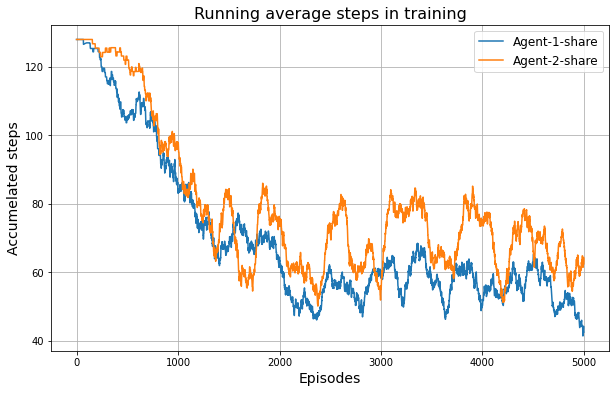

In [330]:
# 设置图片大小
plt.figure(figsize=(10, 6))
# 打开网格
plt.grid(True)

# 设置图表标题和坐标轴标签
plt.title(f'Running average steps in training', fontsize=16)  #  with 5 times training
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Accumelated steps', fontsize=14)

plt.plot(mavg_episode_steps_list_1_share, label='Agent-1-share')
plt.plot(mavg_episode_steps_list_2_share, label='Agent-2-share')

plt.legend(fontsize=12)

# FL

In [396]:
def train(gridworld, agent, episodes, episode_steps_list, episode_rewards_list):
    
    for episode in range(episodes):  # episodes
        state = gridworld.reset()
        done = False
        steps = 0
        total_reward = 0

        while not done:
    #         print(steps)
            action = agent.choose_action(state)
    #         print(state, action)
            next_state, reward, done = gridworld.step(action)
    #         print(next_state, reward, done)
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward
            steps += 1

            if steps >= 128:
                break

    #         print()

    #         break

        episode_steps_list.append(steps)
        episode_rewards_list.append(total_reward)
    
    return 

In [397]:
# Initialize the agent and the environment
gridworld_1 = GridWorld(grid, start, goal, actions)
agent_FL_1 = Agent(alpha, gamma, epsilon, len(actions), (size, size))

gridworld_2 = GridWorld_br(grid, start, goal, actions)
agent_FL_2 = Agent(alpha, gamma, epsilon, len(actions), (size, size))

episode_steps_list_1_FL = []
episode_steps_list_2_FL = []

episode_rewards_list_1_FL = []
episode_rewards_list_2_FL = []

#     plot_rewards(episode_steps_list, ylabel='Steps')
    
# print(f"Episode {episode + 1}: Total Reward = {total_reward}, Total Steps = {steps}")   

In [414]:
import copy

for c in range(int(episodes/10)):
    train(gridworld_1, agent_FL_1, 10, episode_steps_list_1_FL, episode_rewards_list_1_FL)
    train(gridworld_2, agent_FL_2, 10, episode_steps_list_2_FL, episode_rewards_list_2_FL)
    
#     global_qvalues = copy.deepcopy(agent_FL_1.q_values)
    global_qvalues = agent_FL_1.q_values*1 + agent_FL_2.q_values*0
    
    agent_FL_1.q_values = copy.deepcopy(global_qvalues)
    agent_FL_2.q_values = copy.deepcopy(global_qvalues)

In [415]:
# agent_FL_1.q_values[:5, :5, ...].shape

In [416]:
# def draw_Q_table(q_table):

#     # 假设你的Q-table是一个形状为(rows, cols, 4)的numpy数组，4代表4个动作(上、下、左、右)
#     # q_table = agent_FL_1.q_values[:5, :5, ...]

#     # 获取Q-table的行数和列数
#     rows, cols, _ = q_table.shape

#     # 创建一个画布
#     fig, ax = plt.subplots()

#     # 设置坐标轴的范围
#     ax.set_xlim(0, cols)
#     ax.set_ylim(0, rows)

#     # 画出网格线
#     for i in range(rows + 1):
#         ax.hlines(i, 0, cols, colors='k')
#     for i in range(cols + 1):
#         ax.vlines(i, 0, rows, colors='k')

#     # 画出对角线
#     for i in range(rows):
#         for j in range(cols):
#             ax.plot([j, j + 1], [i, i + 1], 'k')
#             ax.plot([j, j + 1], [i + 1, i], 'k')

#     # 画出Q-table的值
#     for i in range(rows):
#         for j in range(cols):
#             q_values = q_table[i, j]
#             for k, q_value in enumerate(q_values):
#                 if k == 0:  # 向上
#                     x, y = j + 0.5, i + 0.75
#                 elif k == 1:  # 向下
#                     x, y = j + 0.5, i + 0.25
#                 elif k == 2:  # 向左
#                     x, y = j + 0.25, i + 0.5
#                 else:  # 向右
#                     x, y = j + 0.75, i + 0.5
#                 ax.text(x, y, f"{q_value:.2f}", ha='center', va='center')

#     plt.gca().invert_yaxis()
#     plt.show()


In [417]:
# plot_rewards(episode_steps_list_1, True, ylabel='Steps')
# plot_rewards(episode_rewards_list_1, True, ylabel='Steps')

In [418]:
# plot_rewards(episode_steps_list_2, True, ylabel='Steps')
# plot_rewards(episode_rewards_list_2, True, ylabel='Steps')

In [419]:
# 假如两个环境不同，那么得到的都是次优解
# 所以加入ID Embedding

In [420]:
mavg_episode_steps_list = moving_average(episode_steps_list)
mavg_episode_steps_list_br = moving_average(episode_steps_list_br)

mavg_episode_steps_list_1_share = moving_average(episode_steps_list_1_share)
mavg_episode_steps_list_2_share = moving_average(episode_steps_list_2_share)

mavg_episode_steps_list_1_FL = moving_average(episode_steps_list_1_FL)
mavg_episode_steps_list_2_FL = moving_average(episode_steps_list_2_FL)

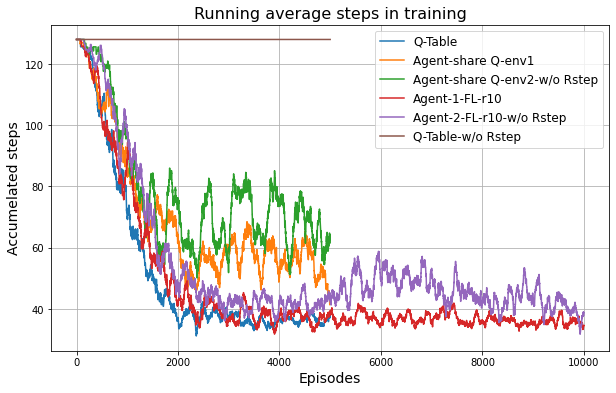

In [421]:
# 设置图片大小
plt.figure(figsize=(10, 6))
# 打开网格
plt.grid(True)

# 设置图表标题和坐标轴标签
plt.title(f'Running average steps in training', fontsize=16)  #  with 5 times training
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Accumelated steps', fontsize=14)

plt.plot(mavg_episode_steps_list, label='Q-Table')

plt.plot(mavg_episode_steps_list_1_share, label='Agent-share Q-env1')
plt.plot(mavg_episode_steps_list_2_share, label='Agent-share Q-env2-w/o Rstep')

plt.plot(mavg_episode_steps_list_1_FL, label='Agent-1-FL-r10')
plt.plot(mavg_episode_steps_list_2_FL, label='Agent-2-FL-r10-w/o Rstep')

plt.plot(mavg_episode_steps_list_br, label='Q-Table-w/o Rstep')
# plt.xlim([0, 3500])

plt.legend(fontsize=12)


In [422]:
mavg_episode_rewards_list = moving_average(episode_rewards_list)
mavg_episode_rewards_list_br = moving_average(episode_rewards_list_br)

mavg_episode_rewards_list_1_share = moving_average(episode_rewards_list_1_share)
mavg_episode_rewards_list_2_share = moving_average(episode_rewards_list_2_share)

mavg_episode_rewards_list_1_FL = moving_average(episode_rewards_list_1_FL)
mavg_episode_rewards_list_2_FL = moving_average(episode_rewards_list_2_FL)

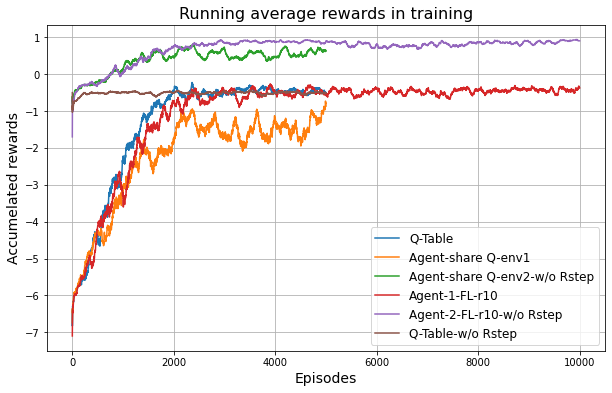

In [423]:
# 设置图片大小
plt.figure(figsize=(10, 6))
# 打开网格
plt.grid(True)

# 设置图表标题和坐标轴标签
plt.title(f'Running average rewards in training', fontsize=16)  #  with 5 times training
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Accumelated rewards', fontsize=14)

plt.plot(mavg_episode_rewards_list, label='Q-Table')

plt.plot(mavg_episode_rewards_list_1_share, label='Agent-share Q-env1')
plt.plot(mavg_episode_rewards_list_2_share, label='Agent-share Q-env2-w/o Rstep')

plt.plot(mavg_episode_rewards_list_1_FL, label='Agent-1-FL-r10')
plt.plot(mavg_episode_rewards_list_2_FL, label='Agent-2-FL-r10-w/o Rstep')

plt.plot(mavg_episode_rewards_list_br, label='Q-Table-w/o Rstep')

plt.legend(fontsize=12)


# Test

In [424]:
def test(agent):
    total = 0
    success = 0
    succ_map = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if grid[i][j] == 1:
                total += 1
                if i == j == size - 1:
#                     succ_map[i][j] = 1
                    break

                steps = 0

                state = gridworld.reset(position=(i, j))

                done = False
                while not done:
                    action = np.argmax(agent.q_values[state[0], state[1]])
                    next_state, reward, done = gridworld.step(action)
                    state = next_state
                    steps += 1

                    if steps >= 178:
                        break

                if steps < 178:
                    success +=1
                    succ_map[i][j] = 1
    return success, total, success / total * 100, succ_map
        
        

808 832 97.11538461538461


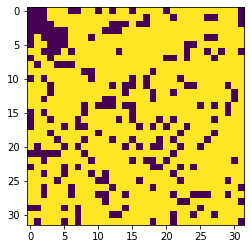

In [425]:
success, total, rate, succ_map = test(agent)
print(success, total, rate)
plt.imshow(succ_map)

0 832 0.0


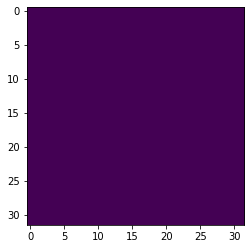

In [426]:
success, total, rate, succ_map = test(agent_br)
print(success, total, rate)
plt.imshow(succ_map)

470 832 56.49038461538461


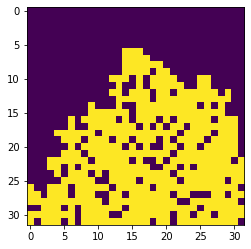

In [427]:
success, total, rate, succ_map = test(agent_share)
print(success, total, rate)
plt.imshow(succ_map)

798 832 95.91346153846155


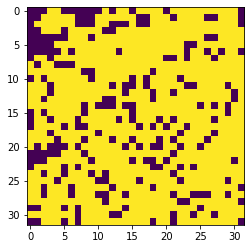

In [428]:
success, total, rate, succ_map = test(agent_FL_1)
print(success, total, rate)
plt.imshow(succ_map)

In [429]:
test(agent_FL_2)

(798,
 832,
 95.91346153846155,
 array([[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 1., ..., 1., 1., 0.],
        [0., 1., 1., ..., 1., 1., 0.],
        ...,
        [0., 0., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 0.]]))

# FL5

In [1511]:
# Initialize the agent and the environment
gridworld_1 = GridWorld(grid, start, goal, actions)
agent_1 = Agent(alpha, gamma, epsilon, len(actions), (size, size))

gridworld_2 = GridWorld_br(grid, start, goal, actions)
agent_2 = Agent(alpha, gamma, epsilon, len(actions), (size, size))

gridworld_3 = GridWorld_br(grid, start, goal, actions)
agent_3 = Agent(alpha, gamma, epsilon, len(actions), (size, size))

gridworld_4 = GridWorld_br(grid, start, goal, actions)
agent_4 = Agent(alpha, gamma, epsilon, len(actions), (size, size))

# gridworld_5 = GridWorld(grid, start, goal, actions)
# agent_5 = Agent(alpha, gamma, epsilon, len(actions), (size, size))

episode_steps_list_1 = []
episode_steps_list_2 = []
episode_steps_list_3 = []
episode_steps_list_4 = []
# episode_steps_list_5 = []

episode_rewards_list_1 = []
episode_rewards_list_2 = []
episode_rewards_list_3 = []
episode_rewards_list_4 = []
# episode_rewards_list_5 = []

#     plot_rewards(episode_steps_list, ylabel='Steps')
    
# print(f"Episode {episode + 1}: Total Reward = {total_reward}, Total Steps = {steps}")   

In [1512]:
import copy

for c in range(int(episodes/10)):
    train(gridworld_1, agent_1, 10, episode_steps_list_1, episode_rewards_list_1)
    train(gridworld_2, agent_2, 10, episode_steps_list_2, episode_rewards_list_2)
    train(gridworld_3, agent_3, 10, episode_steps_list_3, episode_rewards_list_3)
    train(gridworld_4, agent_4, 10, episode_steps_list_4, episode_rewards_list_4)
#     train(gridworld_5, agent_5, 10, episode_steps_list_5, episode_rewards_list_5)
    
    global_qvalues = copy.deepcopy(agent_1.q_values) / 4
    global_qvalues = global_qvalues + agent_2.q_values/4
    global_qvalues = global_qvalues + agent_3.q_values/4
    global_qvalues = global_qvalues + agent_4.q_values/4
#     global_qvalues = global_qvalues + agent_5.q_values/5
    
    agent_1.q_values = copy.deepcopy(global_qvalues)
    agent_2.q_values = copy.deepcopy(global_qvalues)
    agent_3.q_values = copy.deepcopy(global_qvalues)
    agent_4.q_values = copy.deepcopy(global_qvalues)
#     agent_5.q_values = copy.deepcopy(global_qvalues)

In [1513]:
mavg_episode_steps_list = moving_average(episode_steps_list, window_size=100)
mavg_episode_steps_list_1 = moving_average(episode_steps_list_1, window_size=100)
mavg_episode_steps_list_2 = moving_average(episode_steps_list_2, window_size=100)
mavg_episode_steps_list_3 = moving_average(episode_steps_list_3, window_size=100)
mavg_episode_steps_list_4 = moving_average(episode_steps_list_4, window_size=100)
# mavg_episode_steps_list_5 = moving_average(episode_steps_list_5, window_size=100)

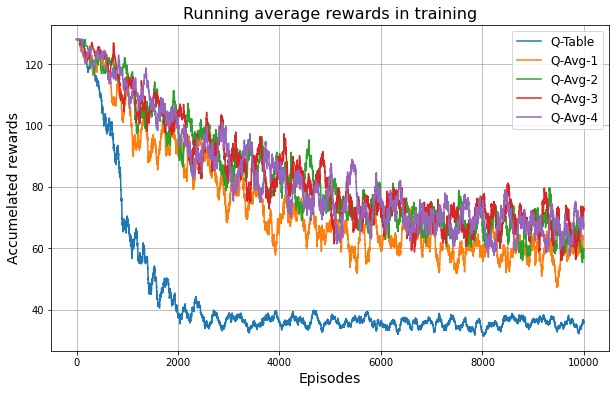

In [1514]:
# 设置图片大小
plt.figure(figsize=(10, 6))
# 打开网格
plt.grid(True)

# 设置图表标题和坐标轴标签
plt.title(f'Running average rewards in training', fontsize=16)  #  with 5 times training
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Accumelated rewards', fontsize=14)

plt.plot(mavg_episode_steps_list, label='Q-Table')
plt.plot(mavg_episode_steps_list_1, label='Q-Avg-1')
plt.plot(mavg_episode_steps_list_2, label='Q-Avg-2')
plt.plot(mavg_episode_steps_list_3, label='Q-Avg-3')
plt.plot(mavg_episode_steps_list_4, label='Q-Avg-4')
# plt.plot(mavg_episode_steps_list_5, label='Q-Avg-5')

plt.legend(fontsize=12)

In [1515]:
mavg_episode_rewards_list = moving_average(episode_rewards_list, window_size=100)
mavg_episode_rewards_list_1 = moving_average(episode_rewards_list_1, window_size=100)
mavg_episode_rewards_list_2 = moving_average(episode_rewards_list_2, window_size=100)
mavg_episode_rewards_list_3 = moving_average(episode_rewards_list_3, window_size=100)
mavg_episode_rewards_list_4 = moving_average(episode_rewards_list_4, window_size=100)
# mavg_episode_steps_list_5 = moving_average(episode_steps_list_5, window_size=100)

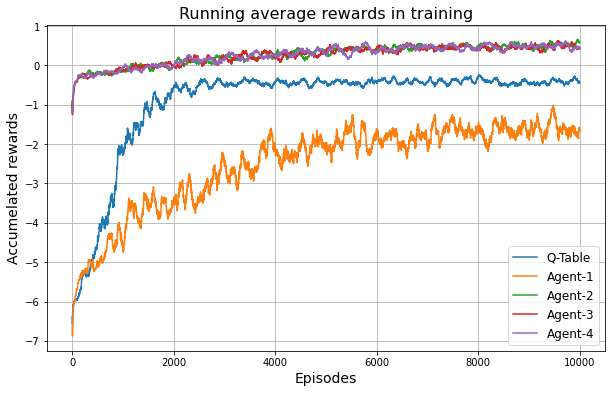

In [1516]:
# 设置图片大小
plt.figure(figsize=(10, 6))
# 打开网格
plt.grid(True)

# 设置图表标题和坐标轴标签
plt.title(f'Running average rewards in training', fontsize=16)  #  with 5 times training
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Accumelated rewards', fontsize=14)

plt.plot(mavg_episode_rewards_list, label='Q-Table')
plt.plot(mavg_episode_rewards_list_1, label='Agent-1')
plt.plot(mavg_episode_rewards_list_2, label='Agent-2')
plt.plot(mavg_episode_rewards_list_3, label='Agent-3')
plt.plot(mavg_episode_rewards_list_4, label='Agent-4')
# plt.plot(mavg_episode_steps_list_5, label='Q-Avg-5')

plt.legend(fontsize=12)